In [1]:
%matplotlib inline

In [2]:
import pandas as pd

### Cargar los conjuntos de datos

+ Cargar los datos de expresión genética $X$

In [3]:
X = pd.read_csv("matrix-MT_AfterPCA.csv", index_col=0)# rows represent genes and columns represent conditions

In [4]:
X

GSM3229893  GSM3229894  GSM3229895  GSM3229902  GSM3229903  \
Rv0001     8.448168    9.242174    8.609518    8.625042    8.375306   
Rv0002     7.018332    7.054956    7.251413    8.213414    7.968146   
Rv0003     6.082074    5.929181    6.144444    7.059091    6.940454   
Rv0004     6.746972    6.559071    6.601368    6.644559    6.685341   
Rv0005     9.526414    9.585069    9.545845    9.617032    9.539455   
...             ...         ...         ...         ...         ...   
Rv3920c    9.201877    9.113229    9.217973    9.588975    9.483261   
Rv3921c    8.863880    8.819495    8.806313    9.096335    9.069775   
Rv3922c    7.823838    8.080698    7.957810    9.124733    9.060108   
Rv3923c    8.342030    8.338711    8.054515    9.244347    9.243752   
Rv3924c    9.118993    9.046602    9.169189    9.882861    9.895304   

         GSM3229904  GSM3229911  GSM3229912  GSM3229913  GSM3230596  ...  \
Rv0001     8.752522    7.626334    6.853028    7.862423    8.546453  ...   
Rv0002     8.428257    7.606290    7.097382    7.793604    7.736873  ...   
Rv0003     6.893028    6.969696    6.785776    7.002397    6.781722  ...   
Rv0004     6.695078    6.707459    6.752608    6.598237    6.619904  ...   
Rv0005     9.713459    9.518295    9.453454    9.638239    9.531064  ...   
...             ...         ...         ...         ...         ...  ...   
Rv3920c    9.471906    9.521844    9.536765    9.567611    9.351985  ...   
Rv3921c    9.246554    9.025374    8.857350    9.037243    9.043492  ...   
Rv3922c    9.098963    9.052423    8.702506    9.193044    8.891107  ...   
Rv3923c    9.191991    9.362779    9.278254    9.494448    8.886913  ...   
Rv3924c    9.874061    9.719589    9.603496    9.786960    9.608540  ...   

         GSM5240577  GSM5240578  GSM5240579  GSM5240580  GSM5240581  \
Rv0001     8.431187    8.306105    8.509488    8.115309    8.325802   
Rv0002     6.750955    6.615496    8.542632    8.037298    6.955923   
Rv0003     7.097831    6.993568    6.820347    6.300313    6.910365   
Rv0004     7.311299    7.396090    6.589303    6.405759    7.088443   
Rv0005    10.185668   10.177200    9.245739    9.186731    9.864429   
...             ...         ...         ...         ...         ...   
Rv3920c    9.787143    9.863443    9.356304    9.230724    9.992385   
Rv3921c    9.542352    9.459349    8.999434    8.365514    9.604645   
Rv3922c    8.918225    8.947539    8.936875    8.495814    9.053860   
Rv3923c    8.866704    8.870424    9.217022    9.008319    9.028536   
Rv3924c    8.743041    8.747080   10.720273   10.074884    9.176250   

         GSM5240582  GSM5534454  GSM5534455  GSM5534456  GSM5534458  
Rv0001     8.308285    7.989610    8.573183    7.825769    8.875338  
Rv0002     6.886517    7.361270    7.990926    7.597836    7.466569  
Rv0003     7.067820    6.247096    7.116217    6.394426    6.840591  
Rv0004     7.391262    6.881990    6.744146    6.262666    6.839968  
Rv0005     9.947940    9.511073    9.648273    9.565235    9.570709  
...             ...         ...         ...         ...         ...  
Rv3920c   10.009382    9.427258    9.373972    9.335661    9.621782  
Rv3921c    9.749862    8.785464    9.050395    8.605942    9.338988  
Rv3922c    9.013692    8.617725    8.848893    8.213344    8.787340  
Rv3923c    8.966080    8.826904    8.903001    8.678966    9.176831  
Rv3924c    8.905936    9.343316    9.648885    9.306546    9.622392  

[4034 rows x 455 columns]

+ Cargar los factores de transcripción

In [5]:
tf = pd.read_csv("TF_M_tuberculosis_H37Rv.csv",header=None)[0]

In [6]:
tf

0       Rv0001
1      Rv0022c
2       Rv0023
3      Rv0042c
4      Rv0043c
        ...   
245    Rv2175c
246     Rv2669
247     Rv0485
248    Rv0891c
249    Rv1357c
Name: 0, Length: 250, dtype: object

# Inferir la GRN
+ Cargar la función 'score_links' y el método 'GENIE3'

In [7]:
from grenadine.Inference.inference import score_links
from grenadine.Inference.regression_predictors import GENIE3

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Inference/inference.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
2024-03-05 09:38:44.629353: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-05 09:38:44.700888: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 09:38:45.930463: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-03-05 09:38:47.120381: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1

sklearn.linear_model.RandomizedLasso could not be loaded
RandomizedLasso is not available in sklearn 1.2.0


In [8]:
GENIE3_params = {"n_estimators":30,
                 'max_depth':3}

+ Calificar todas las aristas posibles entre los factores de transcripción y los genes objetivo

In [9]:
score_matrix = score_links(X, GENIE3, tf, **GENIE3_params)

In [10]:
score_matrix

Rv0003  Rv0022c    Rv0023   Rv0042c   Rv0043c   Rv0047c    Rv0054  \
Rv0001   0.004412      0.0  0.000450  0.000249  0.000000  0.000000  0.000325   
Rv0002   0.001650      0.0  0.000000  0.000000  0.000000  0.000000  0.066686   
Rv0003        NaN      0.0  0.000000  0.023636  0.000000  0.000000  0.000000   
Rv0004   0.355343      0.0  0.025592  0.318700  0.000000  0.000000  0.000957   
Rv0005   0.000000      0.0  0.000000  0.001011  0.000000  0.000000  0.000000   
...           ...      ...       ...       ...       ...       ...       ...   
Rv3920c  0.046042      0.0  0.001275  0.000000  0.000000  0.000000  0.000000   
Rv3921c  0.028676      0.0  0.000372  0.000000  0.000000  0.000000  0.001172   
Rv3922c  0.486992      0.0  0.000000  0.000000  0.021699  0.000000  0.000000   
Rv3923c  0.579315      0.0  0.000000  0.000000  0.004507  0.001415  0.029967   
Rv3924c  0.003874      0.0  0.000125  0.002492  0.003928  0.001463  0.326403   

         Rv0067c  Rv0078    Rv0081  ...    Rv3736    Rv3744   Rv3765c  \
Rv0001       0.0     0.0  0.000000  ...  0.000000  0.000000  0.000215   
Rv0002       0.0     0.0  0.000000  ...  0.000000  0.000341  0.000749   
Rv0003       0.0     0.0  0.000000  ...  0.003935  0.001403  0.000000   
Rv0004       0.0     0.0  0.000000  ...  0.000000  0.000000  0.000000   
Rv0005       0.0     0.0  0.000000  ...  0.000000  0.000000  0.000000   
...          ...     ...       ...  ...       ...       ...       ...   
Rv3920c      0.0     0.0  0.000000  ...  0.000000  0.001751  0.000000   
Rv3921c      0.0     0.0  0.000000  ...  0.000000  0.000000  0.000000   
Rv3922c      0.0     0.0  0.000000  ...  0.000000  0.000000  0.000000   
Rv3923c      0.0     0.0  0.000000  ...  0.000000  0.004376  0.002747   
Rv3924c      0.0     0.0  0.000874  ...  0.000000  0.000000  0.005218   

          Rv3830c  Rv3833    Rv3849    Rv3855   Rv3862c    Rv3863    Rv0001  
Rv0001   0.000789     0.0  0.001092  0.000000  0.000000  0.000000       NaN  
Rv0002   0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.005249  
Rv0003   0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.000000  
Rv0004   0.000000     0.0  0.000000  0.000000  0.000918  0.000000  0.000000  
Rv0005   0.000000     0.0  0.000000  0.000000  0.000000  0.000000  0.000396  
...           ...     ...       ...       ...       ...       ...       ...  
Rv3920c  0.000000     0.0  0.000000  0.001003  0.000000  0.000000  0.001453  
Rv3921c  0.000000     0.0  0.000975  0.000000  0.000000  0.000486  0.000000  
Rv3922c  0.000000     0.0  0.002024  0.000000  0.000000  0.000000  0.002872  
Rv3923c  0.000000     0.0  0.000877  0.000000  0.001039  0.000000  0.009908  
Rv3924c  0.000000     0.0  0.000000  0.000853  0.000000  0.000000  0.000000  

[4034 rows x 249 columns]

In [11]:
score_matrix.to_csv("GRENADINE-GENIE3-MT.csv", sep = "\t", header = True)

# Visualizar los resultados

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

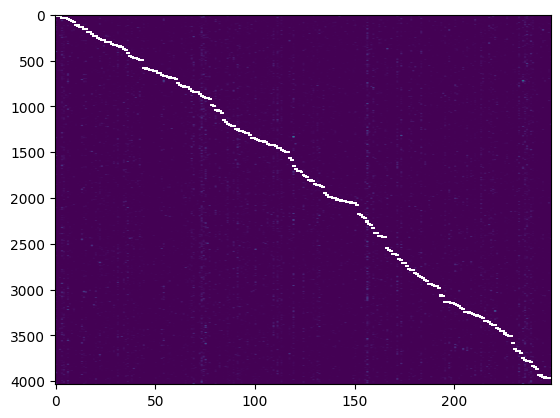

In [13]:
plt.imshow(score_matrix,aspect="auto")

# Clasificar las interacciones de acuerdo a sus puntuaciones

In [14]:
from grenadine.Inference.inference import rank_GRN
ranking = rank_GRN(score_matrix)

In [15]:
ranking.head(20)

rank     score       TF       TG
Rv3855_Rv3854c    1.0  0.981362   Rv3855  Rv3854c
Rv0678_Rv0677c    2.0  0.965732   Rv0678  Rv0677c
Rv3249c_Rv3250c   3.0  0.962566  Rv3249c  Rv3250c
Rv2989_Rv2988c    4.0  0.961341   Rv2989  Rv2988c
Rv3295_Rv0655     5.0  0.955668   Rv3295   Rv0655
Rv0054_Rv0055     6.0  0.947906   Rv0054   Rv0055
Rv2213_Rv2922c    7.0  0.947616   Rv2213  Rv2922c
Rv2213_Rv2844     8.0  0.945344   Rv2213   Rv2844
Rv0081_Rv0082     9.0  0.943853   Rv0081   Rv0082
Rv2213_Rv1812c   10.0  0.943069   Rv2213  Rv1812c
Rv1657_Rv1654    11.0  0.940921   Rv1657   Rv1654
Rv0081_Rv0083    12.0  0.935568   Rv0081   Rv0083
Rv0823c_Rv0824c  13.0  0.928546  Rv0823c  Rv0824c
Rv0653c_Rv0652   14.0  0.924235  Rv0653c   Rv0652
Rv0196_Rv0197    15.0  0.923168   Rv0196   Rv0197
Rv1994c_Rv1993c  16.0  0.922910  Rv1994c  Rv1993c
Rv0353_Rv0352    17.0  0.919694   Rv0353   Rv0352
Rv2555c_Rv2553c  18.0  0.918460  Rv2555c  Rv2553c
Rv0212c_Rv0211   19.0  0.912881  Rv0212c   Rv0211
Rv0054_Rv0056    20.0  0.911377   Rv0054   Rv0056

# Evaluar los resultados
+ Cargar los Gold Standard

In [16]:
grn = pd.read_csv("GS_MT-FINAL.csv",header=0)

In [17]:
grn

TF       TG  Unos
0        Rv0001   Rv0001     1
1        Rv0117   Rv0001     0
2        Rv0144   Rv0001     0
3       Rv0212c   Rv0001     0
4        Rv0302   Rv0001     0
...         ...      ...   ...
132629   Rv0576  Rv1999c     0
132630   Rv1379  Rv1999c     0
132631  Rv3082c  Rv1999c     0
132632  Rv1963c  Rv1999c     0
132633  Rv1846c  Rv1999c     0

[132634 rows x 3 columns]

In [18]:
# Rename the columns and the index
grn.columns = ["TF","TG","IS_REGULATED"]
grn.index = grn["TF"]+"_"+grn["TG"]
# Drop duplicate rows
grn = grn.drop_duplicates()

In [19]:
grn

TF       TG  IS_REGULATED
Rv0001_Rv0001     Rv0001   Rv0001             1
Rv0117_Rv0001     Rv0117   Rv0001             0
Rv0144_Rv0001     Rv0144   Rv0001             0
Rv0212c_Rv0001   Rv0212c   Rv0001             0
Rv0302_Rv0001     Rv0302   Rv0001             0
...                  ...      ...           ...
Rv0576_Rv1999c    Rv0576  Rv1999c             0
Rv1379_Rv1999c    Rv1379  Rv1999c             0
Rv3082c_Rv1999c  Rv3082c  Rv1999c             0
Rv1963c_Rv1999c  Rv1963c  Rv1999c             0
Rv1846c_Rv1999c  Rv1846c  Rv1999c             0

[132634 rows x 3 columns]

+ Cargar la función `evaluate_result` 

In [20]:
from grenadine.Evaluation.evaluation import evaluate_result

In [21]:
metrics = evaluate_result(score_matrix, grn, n_links=100000)

/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Evaluation/evaluation.py:459: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ranks_top_in_golden = ranks_top.loc[mutual_edges]
/home/alexisv/.local/lib/python3.8/site-packages/grenadine/Evaluation/evaluation.py:461: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  golden = gold_std_grn.loc[mutual_edges]


In [22]:
metrics

AUROC        0.590706
AUPR         0.094782
Precision    0.043232
Recall       0.547315
Accuracy     0.572225
F1           0.080135
dtype: float64